In [183]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

# Read the City and Ride Data
print(city_data.shape)
print(ride_data.shape)
ride_data.head()


(120, 3)
(2375, 4)


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [184]:
print(city_data.columns)
ride_data.columns

Index(['city', 'driver_count', 'type'], dtype='object')


Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [185]:
# Combine the data into a single dataset
ride_data["fare"] = ride_data["fare"].astype(float)
ride_data_grouped = ride_data.groupby("city")
ride_count = ride_data_grouped["ride_id"].count()
avg = ride_data_grouped["fare"].mean()
summary_df = pd.DataFrame(dict([("Average Fare",avg),("Ride Count",ride_count)]))
pyber_cleaned_data = pd.merge(summary_df,city_data,on="city")
pyber_cleaned_data=pyber_cleaned_data.rename(columns = {"city":"City","driver_count":"Driver Count","type":"Type"})

### Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.show(*args, **kw)>

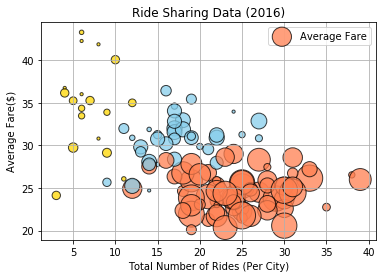

In [186]:
 # Obtain the x and y coordinates for each of the three city types
colors = []
for type in pyber_cleaned_data["Type"]:
    if type == "Urban":
        colors.append("coral")
    elif type == "Suburban":
        colors.append("skyblue")
    else:
        colors.append("gold")

x=pyber_cleaned_data["Ride Count"]
y=pyber_cleaned_data["Average Fare"]
s=pyber_cleaned_data["Driver Count"]
plt.scatter(x=x,
           y=y,
           s=s * 10,
# plt.scatter(x=pyber_cleaned_data["Ride Count"],
#            y=pyber_cleaned_data["Average Fare"],
#            s=pyber_cleaned_data["Driver Count"] * 10,
           marker="o", alpha=0.75, edgecolors="black", c=colors)
# Build the scatter plots for each city types

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Ride Sharing Data (2016)")
plt.grid()
# Create a legend
# type_list = []
# for i in pyber_cleaned_data["Type"]:
#     if i in type_list:
#         type_list.append("")
# urban, = plt.plot(pyber_cleaned_data["Type"], marker="o",color="coral", label="Urban")
# suburban, = plt.plot(x, marker="o",color="skyblue", label="Suburban")
# rural, = plt.plot(x, marker="o",color="gold", label="Rural")
plt.legend()
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../matplotlib_challenge/pyber_bubble_plot.png")
plt.show

### Total Fares by City Type

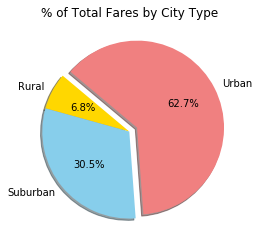

In [187]:
pyber_data = pd.merge(ride_data,city_data,on="city")

#  # Calculate Type Percents
total_fare = pyber_data["fare"].sum()
fares_by_type = pyber_data.groupby("type")["fare"].sum()
pyber_fares_chart = pd.DataFrame({"Fares by Type": ((pyber_data.groupby("type")["fare"].sum())/total_fare)*100})
labels = list(pyber_fares_chart.index)
# # Build Pie Chart
plt.pie(pyber_fares_chart["Fares by Type"],labels = labels,autopct="%0.1f%%",explode=[0,0,0.1],shadow=True,colors=["gold","skyblue","lightcoral"],startangle=140)
plt.title("% of Total Fares by City Type")
plt.show
# # Save Figure
plt.savefig("../matplotlib_challenge/fares_by_city_type.png")

### Total Rides by City Type

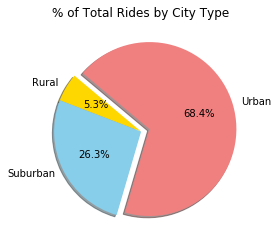

In [188]:
 # Calculate Ride Percents
total_rides = pyber_data["ride_id"].nunique()
rides_by_type = pyber_data.groupby("type")
pyber_rides_chart = pd.DataFrame({"Rides by Type": ((pyber_data.groupby("type")["ride_id"].count())/total_rides)*100})
labels = list(pyber_rides_chart.index)
# Build Pie Chart
labels=list(pyber_rides_chart.index)
plt.pie(pyber_rides_chart["Rides by Type"],labels = labels,autopct="%0.1f%%",explode=[0,0,0.1],shadow=True,colors=["gold","skyblue","lightcoral"],startangle=140)
plt.title("% of Total Rides by City Type")
plt.show
# Save Figure
plt.savefig("../matplotlib_challenge/rides_by_city_type.png")

### Total Drivers by City Type

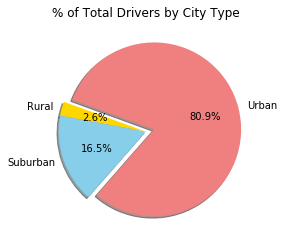

In [189]:
driver_summary = pyber_data.drop_duplicates("city")
total_driver_count = driver_summary["driver_count"].sum()
driver_count_by_city_type_chart = pd.DataFrame({"Driver Count By Type": driver_summary.groupby("type")["driver_count"].sum()})

labels=list(driver_count_by_city_type_chart.index)
plt.pie(driver_count_by_city_type["Driver Count By Type"],labels = labels,autopct="%0.1f%%",explode=[0,0,0.1],shadow=True,colors=["gold","skyblue","lightcoral"],startangle=160)
plt.title("% of Total Drivers by City Type")
plt.show
plt.savefig("../matplotlib_challenge/driver_count_by_city_type_chart.png")